## Life Expectancy Prediction

In [33]:
from __future__ import print_function, division
%matplotlib inline
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import thinkstats2
import thinkplot
import scipy.stats
import seaborn as sns
from scipy.stats import norm

 ## Import the Life expectancy dataset
 This will read a csv file into a panda dataframe


In [34]:
df_original = pd.read_csv('Life Expectancy Data.csv')

In [35]:
df_original.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


Computation of summary 

## Data Munging

In [36]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Computation of summary statistics

In [37]:
df_original.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Set the country column as the index of the dataframe

In [38]:
df_inter = df_original.set_index("Country", inplace = False)
df_inter

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


df_inter.unique("Country")

In [39]:
df_inter["Year"].unique

<bound method Series.unique of Country
Afghanistan    2015
Afghanistan    2014
Afghanistan    2013
Afghanistan    2012
Afghanistan    2011
               ... 
Zimbabwe       2004
Zimbabwe       2003
Zimbabwe       2002
Zimbabwe       2001
Zimbabwe       2000
Name: Year, Length: 2938, dtype: int64>

Let us look for null values

In [40]:
df_inter.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Renaming columns

In [41]:
df_inter1 = df_inter.rename(columns={"Life expectancy ":"Life_Expectancy", "Total expenditure":"Total_expenditure", ' BMI ':"BMI",' HIV/AIDS':'HIV/AIDS', ' thinness  1-19 years':'Thinness  1-19 years',' thinness 5-9 years':'Thinness 5-9 years'})
df_inter1.head()

,Year,Status,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Missing values imputation

In [42]:
#Life expectancy missing values
a = df_inter1.Life_Expectancy.mean()
df_inter1.Life_Expectancy.fillna(a, inplace=True)

In [43]:
#Alcohol
df_inter1.Alcohol.fillna(0.01, inplace=True)

In [44]:
#Total_expenditure
b = df_inter1.Total_expenditure.median()
df_inter1.fillna(b, inplace=True)

In [45]:
#GDP
c = df_inter1.GDP.median()
df_inter1.GDP.fillna(c, inplace=True)

In [46]:
#Population
d = df_inter1.Population.median()
df_inter1.Population.fillna(d, inplace=True)

In [47]:
#Schooling
e = df_inter1.Schooling.median()
df_inter1.Schooling.fillna(e, inplace=True)

In [48]:
#BMI
f = df_inter1.BMI.mean()
df_inter1.BMI.fillna(f, inplace=True)

In [49]:
#Adult Mortality
g = df_inter1['Adult Mortality'].median()
df_inter1['Adult Mortality'].fillna(g, inplace=True)

In [50]:
#polio
h = df_inter1['Polio'].median()
df_inter1['Polio'].fillna(g, inplace=True)

In [51]:
#Diphtheria 
i = df_inter1['Diphtheria '].median()
df_inter1['Diphtheria '].fillna(g, inplace=True)

In [52]:
#Thinness 1-19 years
j = df_inter1['Thinness  1-19 years'].median()
df_inter1['Thinness  1-19 years'].fillna(g, inplace=True)

In [53]:
#Thinness 5-9 years
k = df_inter1['Thinness 5-9 years'].median()
df_inter1['Thinness 5-9 years'].fillna(g, inplace=True)

In [54]:
#Income composition of resources
l= df_inter1['Income composition of resources'].median()
df_inter1['Income composition of resources'].fillna(g, inplace=True)

In [55]:
#Discard the rest of null values
df_inter1.dropna(inplace=True)

In [56]:
df_final = df_inter1
df_final.head()

,Year,Status,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Splitting the dataset by developed and developing country

In [57]:
df_final.describe()

,Year,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.255123,30.303948,4.299588,738.251295,66.788807,2419.592240,37.944374,42.035739,82.053555,5.924098,81.828913,1.742103,6342.968968,9.923152e+06,4.850296,4.880555,0.919002,11.646721
std,4.613841,9.507640,124.425683,117.926501,4.079052,1987.914858,37.070061,11467.272489,20.229872,160.445548,24.150111,2.400770,24.424076,5.077785,13409.086853,5.407586e+07,4.395626,4.483707,1.204944,3.563122
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,5.755000e+00,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,73.000000,0.000000,0.470000,4.685343,24.000000,0.000000,19.000000,0.000000,77.000000,4.370000,78.000000,0.100000,190.174435,5.874250e+03,1.600000,1.600000,0.504250,9.500000
50%,2008.000000,72.000000,144.000000,3.000000,3.130000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.755000,93.000000,0.100000,1171.983435,5.393575e+05,3.400000,3.400000,0.689500,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.797000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,5.755000,20.700000


## Splitting the dataset by developed and developing country

In [58]:
#developed
grouped1 = df_final.groupby(df_final.Status)
df_final_dpd = grouped1.get_group("Developed")

#developing
grouped2 = df_final.groupby(df_final.Status)
df_final_dpg = grouped2.get_group("Developing")

df_final_dpg.head(), df_final_dpd.head()

(             Year      Status  Life_Expectancy  Adult Mortality  \
 Country                                                           
 Afghanistan  2015  Developing             65.0            263.0   
 Afghanistan  2014  Developing             59.9            271.0   
 Afghanistan  2013  Developing             59.9            268.0   
 Afghanistan  2012  Developing             59.5            272.0   
 Afghanistan  2011  Developing             59.2            275.0   
 
              infant deaths  Alcohol  percentage expenditure  Hepatitis B  \
 Country                                                                    
 Afghanistan             62     0.01               71.279624         65.0   
 Afghanistan             64     0.01               73.523582         62.0   
 Afghanistan             66     0.01               73.219243         64.0   
 Afghanistan             69     0.01               78.184215         67.0   
 Afghanistan             71     0.01                7.097109

In [59]:
df_final_dpg.describe(), df_final_dpd.describe()

(              Year  Life_Expectancy  Adult Mortality  infant deaths  \
 count  2426.000000      2426.000000      2426.000000    2426.000000   
 mean   2007.522671        67.120177       182.103277      36.384171   
 std       4.614690         8.988524       128.213588     128.942509   
 min    2000.000000        36.300000         1.000000       0.000000   
 25%    2004.000000        61.100000        91.250000       1.000000   
 50%    2008.000000        69.050000       163.000000       6.000000   
 75%    2012.000000        74.000000       252.750000      28.000000   
 max    2015.000000        89.000000       723.000000    1800.000000   
 
            Alcohol  percentage expenditure  Hepatitis B       Measles   \
 count  2426.000000             2426.000000  2426.000000    2426.000000   
 mean      3.246401              323.470285    68.171434    2824.926216   
 std       3.347921              846.655356    35.707280   12528.811419   
 min       0.010000                0.000000     1.

# Histogram and normality test

ShapiroResult(statistic=0.9563312530517578, pvalue=8.011480975249593e-29)

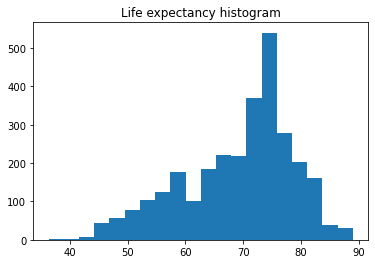

In [60]:
#Life expectancy
matplotlib.pyplot.hist(df_final.Life_Expectancy, bins = 20)
matplotlib.pyplot.title("Life expectancy histogram")
scipy.stats.shapiro(df_final.Life_Expectancy)

Text(0.5, 1.0, 'Status histogram')

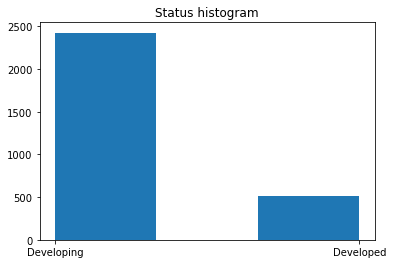

In [61]:
#status
matplotlib.pyplot.hist(df_final.Status, bins = 3)
matplotlib.pyplot.title("Status histogram")

ShapiroResult(statistic=0.8327409625053406, pvalue=0.0)

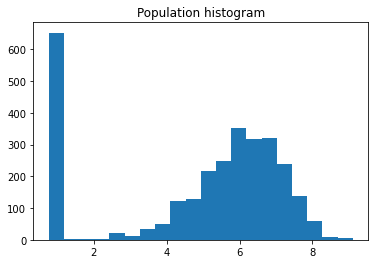

In [62]:
#population
s = np.log10(df_final['Population'])
matplotlib.pyplot.hist(s, bins = 20)
matplotlib.pyplot.title("Population histogram")
scipy.stats.shapiro(s)

ShapiroResult(statistic=0.9789595603942871, pvalue=1.8717378277364555e-20)

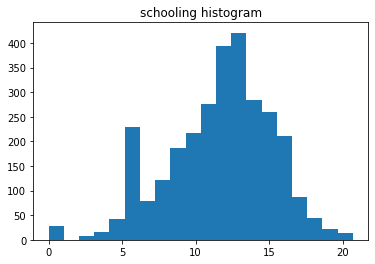

In [63]:
#schooling
matplotlib.pyplot.hist(df_final.Schooling, bins = 20)
matplotlib.pyplot.title("schooling histogram")
scipy.stats.shapiro(df_final.Schooling)

ShapiroResult(statistic=0.9296920299530029, pvalue=4.193721598422736e-35)

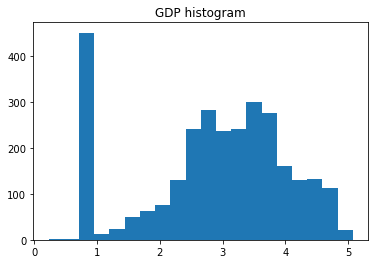

In [64]:
#GDP
t = np.log10(df_final['GDP'])
matplotlib.pyplot.hist(t, bins = 20)
matplotlib.pyplot.title("GDP histogram")
scipy.stats.shapiro(t)

ShapiroResult(statistic=0.9290607571601868, pvalue=3.1512954466037503e-35)

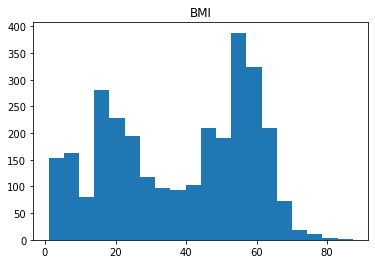

In [65]:
#BMI
matplotlib.pyplot.hist(df_final.BMI, bins = 20)
matplotlib.pyplot.title("BMI")
scipy.stats.shapiro(df_final.BMI)

ShapiroResult(statistic=0.8905285000801086, pvalue=1.5817857065298535e-41)

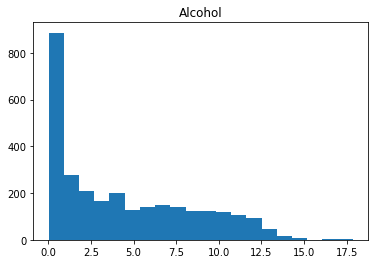

In [66]:
#Alcohol
matplotlib.pyplot.hist(df_final.Alcohol, bins = 20)
matplotlib.pyplot.title("Alcohol")
scipy.stats.shapiro(df_final.Alcohol)

## Correlations

In [67]:
df_final.corr()

,Year,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.083812,-0.037415,-0.155874,0.031400,0.334936,-0.082493,0.105477,-0.042937,0.107582,0.074552,0.146181,-0.139741,0.090484,0.013908,-0.047421,-0.050465,0.051281,0.184674
Life_Expectancy,0.169623,1.000000,-0.694426,-0.196535,0.369792,0.381791,0.248919,-0.157574,0.571886,-0.222503,0.466430,0.207940,0.479981,-0.556457,0.428983,-0.029947,-0.474759,-0.469097,0.065137,0.676742
Adult Mortality,-0.083812,-0.694426,1.000000,0.079647,-0.181484,-0.240813,-0.138525,0.032006,-0.396853,0.095014,-0.280977,-0.114931,-0.281328,0.523681,-0.279193,-0.003711,0.304259,0.309631,-0.030075,-0.416614
infant deaths,-0.037415,-0.196535,0.079647,1.000000,-0.105467,-0.085612,-0.143406,0.501128,-0.225906,0.996629,-0.162677,-0.126268,-0.167210,0.025231,-0.101052,0.551762,0.465744,0.471378,0.008547,-0.189855
Alcohol,-0.155874,0.369792,-0.181484,-0.105467,1.000000,0.353509,-0.038569,-0.042617,0.302543,-0.102046,0.219857,0.289398,0.216931,-0.034495,0.302085,-0.023464,-0.397480,-0.387039,0.146285,0.403849
percentage expenditure,0.031400,0.381791,-0.240813,-0.085612,0.353509,1.000000,-0.111213,-0.056596,0.231577,-0.087852,0.149173,0.175559,0.145698,-0.097857,0.901694,-0.015937,-0.251962,-0.253460,-0.024496,0.391647
Hepatitis B,0.334936,0.248919,-0.138525,-0.143406,-0.038569,-0.111213,1.000000,-0.121180,0.181586,-0.156963,0.426418,0.000593,0.502691,-0.126004,-0.044851,-0.043702,-0.090248,-0.092635,-0.001164,0.217498
Measles,-0.082493,-0.157574,0.032006,0.501128,-0.042617,-0.056596,-0.121180,1.000000,-0.171984,0.507809,-0.127307,-0.104133,-0.133028,0.030899,-0.069287,0.237178,0.224516,0.220797,0.059670,-0.145475
BMI,0.105477,0.571886,-0.396853,-0.225906,0.302543,0.231577,0.181586,-0.171984,1.000000,-0.236800,0.293421,0.231749,0.291814,-0.240349,0.277096,-0.069512,-0.527783,-0.534377,0.045993,0.516835
under-five deaths,-0.042937,-0.222503,0.095014,0.996629,-0.102046,-0.087852,-0.156963,0.507809,-0.236800,1.000000,-0.180459,-0.127960,-0.187390,0.038062,-0.104220,0.539391,0.467868,0.472332,0.008167,-0.205027


In [68]:
#Add new column to the dataset
df_final['Population_logarithm_base10'] = np.log10(df_final['Population'])
df_final['GDP_logarithm_base10'] = np.log10(df_final['GDP'])
df_final.corr()

,Year,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Population_logarithm_base10,GDP_logarithm_base10
Year,1.000000,0.169623,-0.083812,-0.037415,-0.155874,0.031400,0.334936,-0.082493,0.105477,-0.042937,...,0.146181,-0.139741,0.090484,0.013908,-0.047421,-0.050465,0.051281,0.184674,0.009052,0.096938
Life_Expectancy,0.169623,1.000000,-0.694426,-0.196535,0.369792,0.381791,0.248919,-0.157574,0.571886,-0.222503,...,0.479981,-0.556457,0.428983,-0.029947,-0.474759,-0.469097,0.065137,0.676742,-0.139199,0.386783
Adult Mortality,-0.083812,-0.694426,1.000000,0.079647,-0.181484,-0.240813,-0.138525,0.032006,-0.396853,0.095014,...,-0.281328,0.523681,-0.279193,-0.003711,0.304259,0.309631,-0.030075,-0.416614,0.121136,-0.256895
infant deaths,-0.037415,-0.196535,0.079647,1.000000,-0.105467,-0.085612,-0.143406,0.501128,-0.225906,0.996629,...,-0.167210,0.025231,-0.101052,0.551762,0.465744,0.471378,0.008547,-0.189855,0.150968,-0.086865
Alcohol,-0.155874,0.369792,-0.181484,-0.105467,1.000000,0.353509,-0.038569,-0.042617,0.302543,-0.102046,...,0.216931,-0.034495,0.302085,-0.023464,-0.397480,-0.387039,0.146285,0.403849,0.026922,0.230442
percentage expenditure,0.031400,0.381791,-0.240813,-0.085612,0.353509,1.000000,-0.111213,-0.056596,0.231577,-0.087852,...,0.145698,-0.097857,0.901694,-0.015937,-0.251962,-0.253460,-0.024496,0.391647,0.084099,0.492906
Hepatitis B,0.334936,0.248919,-0.138525,-0.143406,-0.038569,-0.111213,1.000000,-0.121180,0.181586,-0.156963,...,0.502691,-0.126004,-0.044851,-0.043702,-0.090248,-0.092635,-0.001164,0.217498,-0.149234,0.049890
Measles,-0.082493,-0.157574,0.032006,0.501128,-0.042617,-0.056596,-0.121180,1.000000,-0.171984,0.507809,...,-0.133028,0.030899,-0.069287,0.237178,0.224516,0.220797,0.059670,-0.145475,0.057789,-0.074090
BMI,0.105477,0.571886,-0.396853,-0.225906,0.302543,0.231577,0.181586,-0.171984,1.000000,-0.236800,...,0.291814,-0.240349,0.277096,-0.069512,-0.527783,-0.534377,0.045993,0.516835,-0.105291,0.278936
under-five deaths,-0.042937,-0.222503,0.095014,0.996629,-0.102046,-0.087852,-0.156963,0.507809,-0.236800,1.000000,...,-0.187390,0.038062,-0.104220,0.539391,0.467868,0.472332,0.008167,-0.205027,0.154724,-0.091489


<AxesSubplot:>

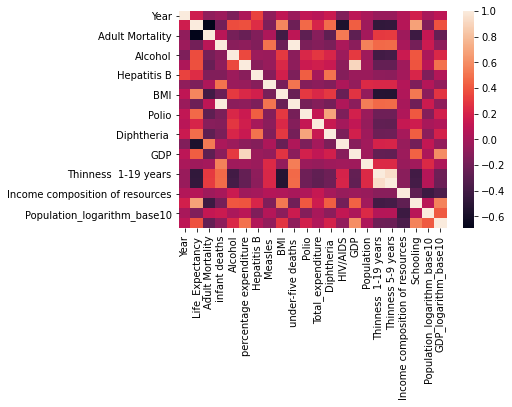

In [69]:
#heatmap of correlation
sns.heatmap(df_final.corr())

In [70]:
# correlation coefficients values
df_final.corr()['Life_Expectancy'].sort_values()

Adult Mortality                   -0.694426
HIV/AIDS                          -0.556457
Thinness  1-19 years              -0.474759
Thinness 5-9 years                -0.469097
under-five deaths                 -0.222503
infant deaths                     -0.196535
Measles                           -0.157574
Population_logarithm_base10       -0.139199
Population                        -0.029947
Income composition of resources    0.065137
Year                               0.169623
Total_expenditure                  0.207940
Hepatitis B                        0.248919
Alcohol                            0.369792
percentage expenditure             0.381791
GDP_logarithm_base10               0.386783
GDP                                0.428983
Polio                              0.466430
Diphtheria                         0.479981
BMI                                0.571886
Schooling                          0.676742
Life_Expectancy                    1.000000
Name: Life_Expectancy, dtype: fl

## Scatter plots and correlation overview

In [71]:
# Life expectancy vs schooling
#(bins = 15, color = "steelblue", edgecolor = "black", linewidth = 1.0, xlabelsize = 8, ylabelsize = 8, grid = False, figsize = (20,20))
pyplot.show()

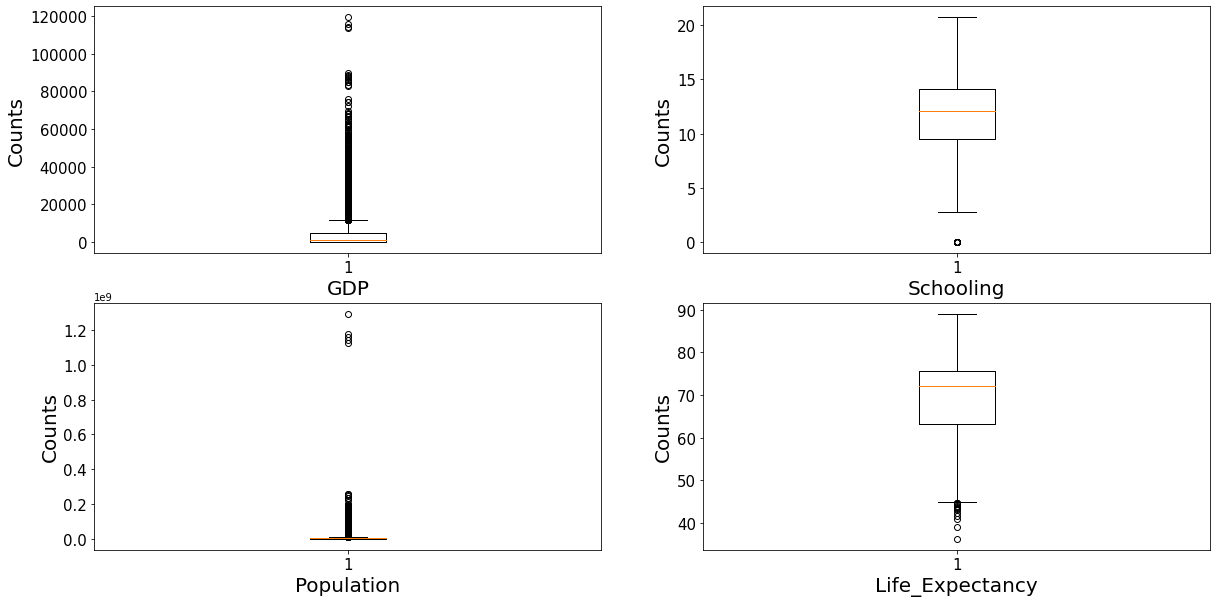

In [72]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['GDP', 'Schooling', 'Population', 'Life_Expectancy']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw boxplot
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.boxplot(df_final[num_features[idx]].dropna(),)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

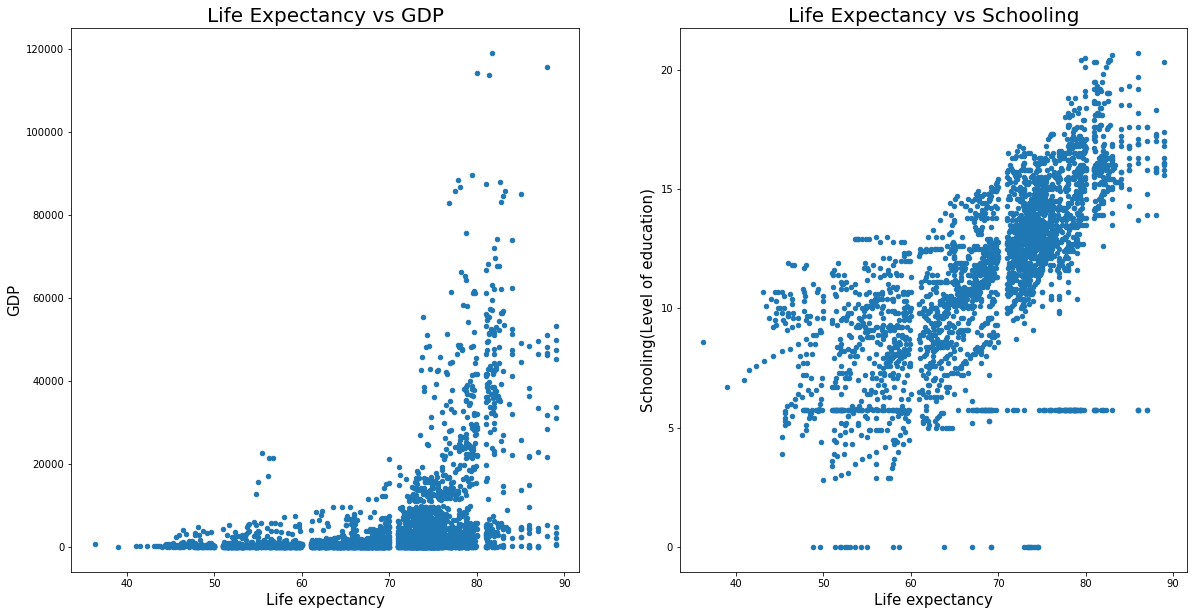

In [73]:
#scatter plot

# set up the figure size
#plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig = plt.figure()

# Specify the features of interest
num_features = ['Life_Expectancy','GDP', 'Schooling', 'Population']
num_target = ['Life_Expectancy','Life_Expectancy','Life_Expectancy',]
xaxes = num_features
yaxes = num_target

# draw Scatters
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title('Life Expectancy vs GDP',fontsize=20,)
ax1.set_xlabel('Life expectancy',fontsize=15)
ax1.set_ylabel('GDP',fontsize=15)

ax2.set_title('Life Expectancy vs Schooling',fontsize=20)
ax2.set_xlabel('Life expectancy',fontsize=15)
ax2.set_ylabel('Schooling(Level of education)',fontsize=15)

ax1.scatter(df_final['Life_Expectancy'],df_final['GDP'], s =20)
ax2.scatter(df_final['Life_Expectancy'],df_final['Schooling'], s=20)

plt.show()

### Hot encoding status column

In [74]:
df_dummy = pd.get_dummies(df_final.Status)

In [75]:
df_dummy.head()

,Developed,Developing
Country,,
Afghanistan,0,1
Afghanistan,0,1
Afghanistan,0,1
Afghanistan,0,1
Afghanistan,0,1


In [76]:
df_dummy = pd.concat([df_final, df_dummy],axis = 1)
df_dummy.head()

,Year,Status,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Population_logarithm_base10,GDP_logarithm_base10,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,7.528100,2.766606,0,1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,612.696514,327582.0,17.5,17.5,0.476,10.0,5.515320,2.787245,0,1
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,7.501493,2.800542,0,1
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,6.567845,2.826048,0,1
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,6.474012,1.803028,0,1


In [77]:
df_dum = df_dummy.drop(['Status','Developing'],axis = 1)
df_dum.head()

,Year,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Population_logarithm_base10,GDP_logarithm_base10,Developed
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,7.528100,2.766606,0
Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,5.515320,2.787245,0
Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,7.501493,2.800542,0
Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,6.567845,2.826048,0
Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,6.474012,1.803028,0


In [78]:
df_dum = df_dum.rename(columns={"Developed":"Status"})
df_dum.head(10)

,Year,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Population_logarithm_base10,GDP_logarithm_base10,Status
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,7.528100,2.766606,0
Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,5.515320,2.787245,0
Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,7.501493,2.800542,0
Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,6.567845,2.826048,0
Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,6.474012,1.803028,0
Afghanistan,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,...,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,6.459870,2.742983,0
Afghanistan,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,...,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,5.453824,2.649231,0
Afghanistan,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,...,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,6.436072,2.572129,0
Afghanistan,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,...,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,7.425156,2.568009,0


In [79]:
df_dum.Status.value_counts()

0    2426
1     512
Name: Status, dtype: int64

## Feature selection

In [80]:
features = df_dum[df_dum.columns.difference(['Life_Expectancy','Country','Year'])]
labels = df_dum['Life_Expectancy']

In [81]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
labels = lab_enc.fit_transform(labels)

In [82]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

1.0


In [83]:
from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
0,Adult Mortality,0.074382
2,BMI,0.067338
17,Total_expenditure,0.064399
8,Income composition of resources,0.062784
1,Alcohol,0.057878
13,Schooling,0.055506
19,percentage expenditure,0.050649
4,GDP,0.049575
5,GDP_logarithm_base10,0.048613
15,Thinness 1-19 years,0.048164


In [84]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()
Selected[Selected['RFE'] == True]

C:\Users\ESSOH GO\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,index,RFE
0,Adult Mortality,True
1,Alcohol,True
2,BMI,True
3,Diphtheria,True
4,GDP,True
5,GDP_logarithm_base10,True
6,HIV/AIDS,True
7,Hepatitis B,True
8,Income composition of resources,True
9,Measles,True


In [85]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.07030118 0.05670151 0.0633859  0.05006622 0.0501822  0.04951041
 0.02856422 0.04676023 0.05720778 0.0489156  0.04963858 0.04387412
 0.0446469  0.05402637 0.0036801  0.04965865 0.04918781 0.05908319
 0.03625426 0.05009587 0.03825891]


In [86]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)
FI = FI.reset_index()
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
0,Adult Mortality,0.070301
2,BMI,0.063386
17,Total_expenditure,0.059083
8,Income composition of resources,0.057208
1,Alcohol,0.056702
13,Schooling,0.054026
4,GDP,0.050182
19,percentage expenditure,0.050096
3,Diphtheria,0.050066
15,Thinness 1-19 years,0.049659


In [87]:
df1 = df_dum.copy()
df1 = df_dum.fillna(0)

from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = df1.apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df1[i] = d[i].transform(df1[i])

In [88]:
features1 = df1[df1.columns.difference(['Life_Expectancy'])]
labels1 = df1['Life_Expectancy']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features1, labels1)
import numpy
numpy.set_printoptions(suppress=True)
print(fit.scores_)

[114770.17778415 277668.32627039 123249.91243455   7000.51570308
 631446.54863516 631446.54863516 169562.38229205  14292.0919908
 169383.53493905 294434.23910582   6859.78934284 271338.55941971
 271338.55941971  22966.3243338    1164.48331404  40135.07066631
  40726.45385793  61493.5100023    1884.37807645  64972.22906176
 599623.50741604  94647.95303159]


In [89]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features1.columns)
chi_sq = chi_sq.reset_index()
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
4,GDP,631446.55
5,GDP_logarithm_base10,631446.55
20,percentage expenditure,599623.51
9,Measles,294434.24
1,Alcohol,277668.33
11,Population,271338.56
12,Population_logarithm_base10,271338.56
6,HIV/AIDS,169562.38
8,Income composition of resources,169383.53
2,BMI,123249.91


In [90]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()
l1[l1['L1'] == True]

C:\Users\ESSOH GO\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,index,L1
0,Adult Mortality,True
1,Alcohol,True
2,BMI,True
3,Diphtheria,True
4,GDP,True
6,HIV/AIDS,True
7,Hepatitis B,True
8,Income composition of resources,True
9,Measles,True
10,Polio,True


In [91]:
from functools import reduce
dfs = [VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)
final_results.head()

,index,RF,RFE,Extratrees,Chi_Square,L1
0,Adult Mortality,0.07,True,0.07,114770.18,True
1,Alcohol,0.06,True,0.06,277668.33,True
2,BMI,0.07,True,0.06,123249.91,True
3,Diphtheria,0.05,True,0.05,7000.52,True
4,GDP,0.05,True,0.05,631446.55,True


In [92]:
final_results.columns

Index(['index', 'RF', 'RFE', 'Extratrees', 'Chi_Square', 'L1'], dtype='object')

In [93]:
columns = ['RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [94]:
score_table['final_score'] = score_table.sum(axis=1)
score_table.sort_values('final_score',ascending=0)

,index,RF,Extratrees,Chi_Square,RFE,L1,final_score
1,Alcohol,1,1,1,1,1,5
0,Adult Mortality,1,1,0,1,1,4
2,BMI,1,1,0,1,1,4
17,Total_expenditure,1,1,0,1,1,4
8,Income composition of resources,1,1,0,1,1,4
19,percentage expenditure,0,0,1,1,1,3
4,GDP,0,0,1,1,1,3
9,Measles,0,0,1,1,1,3
13,Schooling,0,0,0,1,1,2
18,infant deaths,0,0,0,1,1,2


## Models

In [95]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

### Linear Regression

In [96]:
# Model and evaluation metrics
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Split train into a training and test set
X = df_dum.drop(columns =['Year','Life_Expectancy','Thinness  1-19 years', 'infant deaths', 'Thinness 5-9 years', 'Polio','Schooling','Population','Hepatitis B','HIV/AIDS','Diphtheria ','under-five deaths ','Status','GDP_logarithm_base10','Population_logarithm_base10', ])
y = df_dum.Life_Expectancy
X.shape, y.shape

((2938, 8), (2938,))

In [118]:
#Split dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [119]:
#fit the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [120]:
#retrieve intercept and coef
print(regressor.intercept_)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

67.84713533558751


,Coefficient
Adult Mortality,-0.04
Alcohol,0.31
percentage expenditure,-0.00
Measles,-0.00
BMI,0.13
Total_expenditure,0.12
GDP,0.00
Income composition of resources,0.27


In [121]:
#making predictions
y_pred = regressor.predict(X_test)

In [122]:
#prediction dataframe
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head(15)

,Actual,Predicted
Country,,
Turkmenistan,66.00,67.88
Brunei Darussalam,77.10,75.71
Eritrea,67.00,58.07
Syrian Arab Republic,64.40,64.10
Republic of Korea,76.70,74.53
Tunisia,74.70,75.63
Netherlands,79.20,80.58
Sierra Leone,41.00,52.82
Fiji,68.10,67.86


In [127]:
#Model Evaluation
from sklearn import metrics
print('Mean Absolute Error:%.4f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:%.4f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:%.4f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:4.0375
Mean Squared Error:32.1449
Root Mean Squared Error:5.6696


In [128]:
pred_train_ols= regressor.predict(X_train)

print("train rsme:%.4f"%np.sqrt(mean_squared_error(y_train,pred_train_ols)))
print("train rsquared:%.4f"%r2_score(y_train, pred_train_ols))


pred_test_ols= regressor.predict(X_test)
print("test rsme%.4f"%np.sqrt(mean_squared_error(y_test,pred_test_ols))) 
print("test rsquared:%.4f"%r2_score(y_test, pred_test_ols))

train rsme:5.6545
train rsquared:0.6470
test rsme5.6696
test rsquared:0.6410


### Lasso Regression

In [129]:
#Alpha = 0.01
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("train rsme:%.4f"%np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("train rsquared:%.4f"%r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print("test rsme:%.4f"%np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("test rsquared:%.4f"%r2_score(y_test, pred_test_lasso))

train rsme:5.6545
train rsquared:0.6470
test rsme:5.6689
test rsquared:0.6411


In [106]:
#making predictions
y_pred = model_lasso.predict(X_test)
#prediction dataframe
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head(15)

,Actual,Predicted
Country,,
Turkmenistan,66.00,67.89
Brunei Darussalam,77.10,75.72
Eritrea,67.00,58.08
Syrian Arab Republic,64.40,64.11
Republic of Korea,76.70,74.50
Tunisia,74.70,75.63
Netherlands,79.20,80.57
Sierra Leone,41.00,52.81
Fiji,68.10,67.86


In [130]:
#Model Evaluation
from sklearn import metrics
print('Mean Absolute Error:%.4f'% metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:%.4f'% metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:%.4f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:4.0375
Mean Squared Error:32.1449
Root Mean Squared Error:5.6696


In [131]:
# Alpha = 0.5
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("train rsme:%.4f"%np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("train rsquared:%.4f"%r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print("test rsme:%.4f"%np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("test rsquared:%.4f"%r2_score(y_test, pred_test_lasso))

train rsme:5.6680
train rsquared:0.6453
test rsme:5.6496
test rsquared:0.6435


## Ridge regression

In [132]:
#alpha = 0.01
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("train rmse:%.4f"%np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("train rsquared:%.4f"%r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print("test rmse:%.4f"%np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("test rsquared:%.4f"%r2_score(y_test, pred_test_rr))

train rmse:5.6545
train rsquared:0.6470
test rmse:5.6696
test rsquared:0.6410


In [110]:
#making predictions
y_pred = rr.predict(X_test)
#prediction dataframe
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head(15)

,Actual,Predicted
Country,,
Turkmenistan,66.00,67.88
Brunei Darussalam,77.10,75.71
Eritrea,67.00,58.07
Syrian Arab Republic,64.40,64.10
Republic of Korea,76.70,74.53
Tunisia,74.70,75.63
Netherlands,79.20,80.58
Sierra Leone,41.00,52.82
Fiji,68.10,67.86


In [133]:
#Model Evaluation
from sklearn import metrics
print('Mean Absolute Error:%.4f'% metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:%.4f'% metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:%.4f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:4.0375
Mean Squared Error:32.1449
Root Mean Squared Error:5.6696


In [134]:
#alpha = 0.5
rr = Ridge(alpha=0.5)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("train rmse:%.4f"%np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("train rsquared:%.4f"%r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print("train rmse:%.4f"%np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("test rsquared:%.4f"%r2_score(y_test, pred_test_rr))

train rmse:5.6545
train rsquared:0.6470
train rmse:5.6696
test rsquared:0.6410


In [135]:
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)
y_train_pred1 = xgb_model1.predict(X_train)
y_pred1 = xgb_model1.predict(X_test)

print('Train r2 score:%.4f '% r2_score(y_train_pred1, y_train))
print('Test r2 score:%.4f '% r2_score(y_test, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
test_mse1 = mean_squared_error(y_pred1, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

Train r2 score:0.9979 
Test r2 score:0.9491 
Train RMSE: 0.4361
Test RMSE: 2.1355


In [136]:
#making predictions
y_pred = xgb_model1.predict(X_test)
#prediction dataframe
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head(15)

,Actual,Predicted
Country,,
Turkmenistan,66.00,67.57
Brunei Darussalam,77.10,76.93
Eritrea,67.00,61.37
Syrian Arab Republic,64.40,62.18
Republic of Korea,76.70,69.42
Tunisia,74.70,74.81
Netherlands,79.20,80.99
Sierra Leone,41.00,47.19
Fiji,68.10,69.57
